In [ ]:
!pip install -q -U tensorflow>=1.8.0

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model

import requests
from PIL import Image
from io import BytesIO

%matplotlib inline

x_train shape: (60000, 28, 28) y_train shape: (60000,)


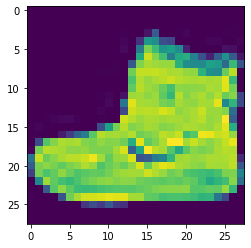

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
plt.imshow(x_train[0])

In [ ]:
Fashion_MNIST_classes = [ 'T-shirt/top',
                   'Trouser',
                   'Pullover',
                   'Dress',
                   'Coat',
                   'Sandal',
                   'Shirt',
                   'Sneaker',
                   'Bag',
                   'Ankle boot']

def class_name(ix):
  return Fashion_MNIST_classes[np.array(ix).flatten()[0]]

Image:


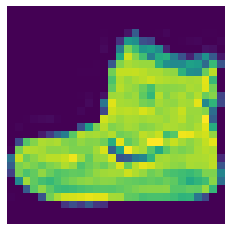

Its class name: Ankle boot


In [ ]:
print(f'Image:')
plt.imshow(x_train[0])
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(y_train[0])}')

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Model

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(56, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(56, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

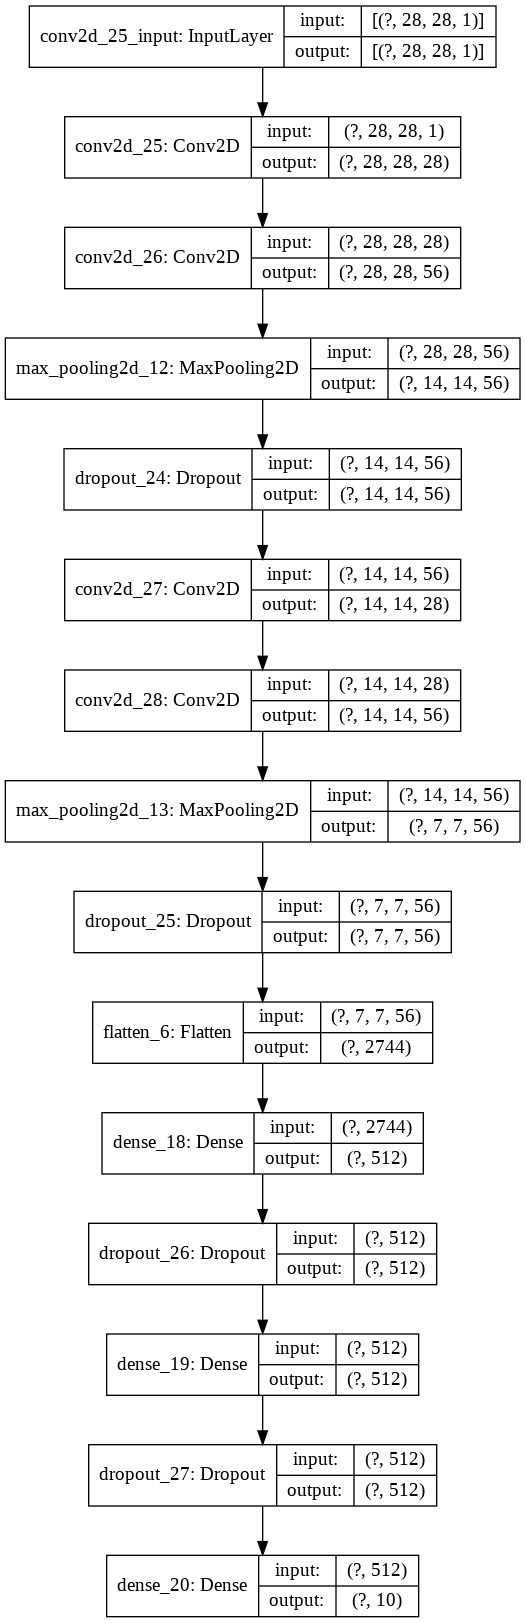

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 132s 352ms/step - loss: 0.2182 - accuracy: 0.9206 - val_loss: 0.2201 - val_accuracy: 0.9183
Epoch 2/2
375/375 [==============================] - 131s 351ms/step - loss: 0.2042 - accuracy: 0.9239 - val_loss: 0.2058 - val_accuracy: 0.9246


In [89]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.2210 - accuracy: 0.9196


[0.22101706266403198, 0.9196000099182129]

In [87]:
def resize_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  square_side = min(width, height)
  img = img.crop((
    np.ceil((width - square_side) / 2),
    np.ceil((height - square_side) / 2),
    np.ceil((width + square_side) / 2),
    np.ceil((height + square_side) / 2)
  ))

  img.thumbnail((28, 28))
  np_array = np.array(img) / 255
  np_array=np_array[:,:,0]
  np_array=np_array.reshape(np_array.shape[0],np_array.shape[1],1)



  return np_array

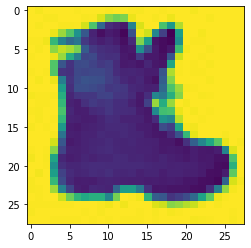

In [ ]:
from skimage import io

boots = io.imread('https://sun9-36.userapi.com/impf/Z27hrs1-l2GN4vs_JQK9VHufyrpK0VUCixDUJg/TbC1t2QstYA.jpg?size=28x28&quality=96&proxy=1&sign=554c92954e0e27459404eafeeb1f7422&type=album', as_gray=True)
plt.imshow(boots)
boots=boots.reshape(boots.shape[0],boots.shape[1],1)

In [ ]:
class_name(np.argmax(model.predict(np.array([boots])))) #неверно:)

'Bag'

In [88]:
class_name(np.argmax(model.predict(np.array([resize_image('https://im0-tub-ru.yandex.net/i?id=72bf934fc04795effdb9003ba7265592&n=13&exp=1')]))))

'Bag'

In [90]:
class_name(np.argmax(model.predict(np.array([resize_image('https://shoptoyou.su/image/cache/data/odnotonnye_futbolki/futbolka_chernaya_detskaya_odnotonnaya_bez_risunka-435x435.jpg')]))))

'Bag'

# у нее все bag